In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import open3d as o3d
import os

from odometry_estimator import OdometryEstimator
from mapping import Mapper
from loader_kitti import LoaderKITTI

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import csv

kitti_odometry_path = '../../data_odometry_poses/dataset/poses/00.txt'
odometry = []
with open(kitti_odometry_path, newline='') as csvfile:
    odometry_reader = csv.reader(csvfile, delimiter=' ')
    for row in odometry_reader:
        row = [float(i) for i in row]
        odometry.append(np.array(row).reshape(3, 4))

path_x_gt = []
path_y_gt = []
for matrix in odometry:
    path_x_gt.append(float(matrix[0, 3]))
    path_y_gt.append(float(matrix[2, 3]))

plt.show()

68 [51.14694928  3.10158207 -0.05600574  1.        ]


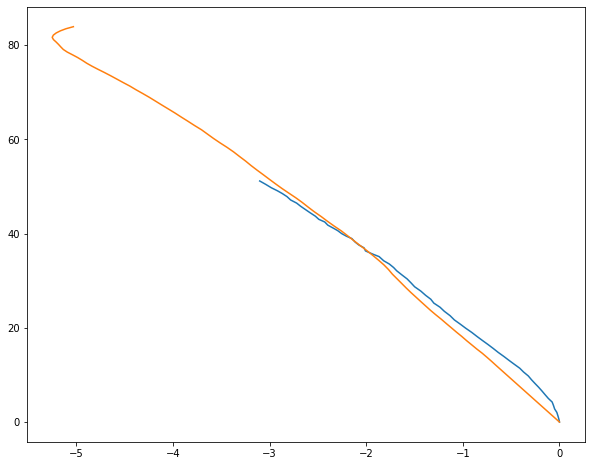

69
Surface count:  333
output:  293
ERROR 4.694917122624125
GT ERROR 5.019594839097393


In [ ]:
from IPython.display import clear_output


folder = '/home/anastasiya/data/data_odometry_velodyne.zip/'
pcds_list = os.listdir(folder)
pcds_list.sort()

odometry = OdometryEstimator()
global_transform = np.eye(4)
pcds = []
mapper = Mapper()
path_x = []
path_y = []

loader = LoaderKITTI(folder, '00')

odometry = OdometryEstimator()
global_transform = np.eye(4)
pcds = []
mapper = Mapper()
for i in range(loader.length()):
    print(i)
    if i % 1 == 0:
        pcd = loader.get_item(i)
        T, sharp_points, flat_points = odometry.append_pcd(pcd)
        mapper.append_undistorted(pcd[0], T, sharp_points, flat_points, vis=False)
        pos = mapper.position
        path_x.append(-pos[1, 3])
        path_y.append(pos[0, 3])
    
        clear_output(wait=True)
        plt.figure(figsize=(10, 8))
        print(i, pos[:, 3])
        plt.plot(path_x, path_y)
        plt.plot(path_x_gt[:100], path_y_gt[:100])
        plt.show()